In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from constants import SPATIAL, MORPHOLOGICAL, TEMPORAL 

In [23]:
PATH = 'clustersData_no_light_newest/0'

In [24]:
df = None
files = os.listdir(PATH)
for file in sorted(files):
    if df is None:
        df = pd.read_csv(PATH + '/' + file)
    else:
        temp = pd.read_csv(PATH + '/' + file)
        df = df.append(temp)

In [25]:
df.label = df.label.map({1: 'PYR', 0: 'IN', -1: 'UT', -3: 'UT'})
pd.value_counts(df.label)

UT     428
PYR    411
IN     101
Name: label, dtype: int64

In [26]:
df = df.loc[df.label != 'UT']

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 0 to 0
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   dep_red                   512 non-null    float64
 1   dep_sd                    512 non-null    float64
 2   graph_avg_speed           512 non-null    float64
 3   graph_slowest_path        512 non-null    float64
 4   graph_fastest_path        512 non-null    float64
 5   geometrical_avg_shift     512 non-null    float64
 6   geometrical_shift_sd      512 non-null    float64
 7   geometrical_max_dist      512 non-null    float64
 8   spatial_dispersion_count  512 non-null    float64
 9   spatial_dispersion_sd     512 non-null    float64
 10  da                        512 non-null    float64
 11  da_sd                     512 non-null    float64
 12  Channels contrast         512 non-null    float64
 13  break_measure             512 non-null    float64
 14  fwhm        

In [28]:
df = df[df.t_time != 128]
df = df[df.t_time != 129]
df = df[df.t_time != 127]
len(df)
df

,dep_red,dep_sd,graph_avg_speed,graph_slowest_path,graph_fastest_path,geometrical_avg_shift,geometrical_shift_sd,geometrical_max_dist,spatial_dispersion_count,spatial_dispersion_sd,da,da_sd,Channels contrast,break_measure,fwhm,get_acc,max_speed,peak2peak,trough2peak,rise_coef,smile_cry,t_time,d_kl,jump,psd_center,der_psd_center,rise_time,unif_dist,num_spikes,max_abs,name,region,label
0,0.000000,0.000000,0.000000,0.000000,0.000000,5.512983,16.537773,150.319836,1.0,0.307007,1276.0,0.909175,102.959877,-1327.198200,38.0,34.539353,96.0,1820.531675,86.0,48.0,-1.220201,165.0,0.207924,190.856738,58.896395,38.388167,258.0,0.042511,11334.0,1050.193224,es04feb12_1_4_17,1.0,PYR
0,19.666667,4.384315,10.880923,6.699917,70.150079,21.800271,23.111400,211.008814,5.0,0.296403,494.0,0.972240,0.000000,-1126.096105,42.0,34.799652,80.0,2276.620129,105.0,67.0,-28.798863,130.0,0.218491,9.165690,520.406856,514.082985,220.0,0.054646,1246.0,1597.468700,m258r1_7_3_8,0.0,PYR
0,338.000000,13.000000,0.000000,0.000000,0.000000,15.905418,26.724566,139.655417,1.0,0.292208,516.0,1.147534,0.000000,-591.812637,47.0,28.844490,104.0,517.692208,94.0,72.0,1.303119,157.0,0.280944,131.169801,94.842439,106.090364,330.0,0.034103,181764.0,287.326308,m361r2_13_1_6,4.0,IN
0,129.166667,7.151146,6.609129,5.071735,49.421871,9.291709,17.738188,164.377841,4.0,0.311951,1260.0,1.373557,1.940494,-733.922811,34.0,43.935498,14.0,987.157538,124.0,47.0,-6.252892,126.0,0.178991,52.652657,336.106996,320.621951,206.0,0.098106,2437.0,731.361920,m361r2_17_4_2,1.0,PYR
0,77.200000,7.605261,5.165402,3.828524,13.470420,10.575157,20.045629,187.313847,3.0,0.291710,1010.0,1.394898,0.000000,-1342.129935,40.0,6.060307,116.0,1461.610036,120.0,57.0,-6.696732,131.0,0.157258,190.884668,132.614713,198.891678,159.0,0.170672,1697.0,914.740719,m361r2_20_1_2,1.0,PYR
0,13.500000,3.354102,11.368254,6.821354,18.430719,24.572076,25.384654,116.730539,3.0,0.353551,844.0,1.088716,0.000000,-2785.141531,32.0,76.696502,42.0,2810.647275,121.0,43.0,-12.549931,130.0,0.161952,83.743375,99.400803,106.421247,156.0,0.161600,1363.0,1939.090242,m531r1_32_1_15,1.0,PYR
0,0.500000,0.500000,39.421579,35.227830,42.059482,51.684838,45.431638,230.478159,3.0,0.382384,866.0,1.280464,0.000000,-988.872465,36.0,29.016098,67.0,1294.759555,121.0,49.0,-4.804983,130.0,0.177289,111.628838,78.134366,57.615676,209.0,0.084428,19704.0,858.899767,m531r1_38_1_17,1.0,PYR
0,3.333333,1.247219,24.235714,14.019827,58.687314,14.101798,22.398383,237.099343,2.0,0.394297,964.0,1.384819,0.000000,-1306.031789,35.0,49.819889,119.0,1654.292403,120.0,44.0,-5.938179,131.0,0.149867,92.059438,140.498863,137.339959,160.0,0.129993,5219.0,1096.966852,m531r1_41_1_6,1.0,PYR
0,32.714286,2.185294,28.872831,5.742786,115.532835,10.968129,16.232646,154.353385,7.0,0.216263,268.0,0.695971,0.000000,-1666.624161,39.0,39.798689,94.0,1685.885398,121.0,49.0,-11.968106,130.0,0.145800,96.581047,85.091980,91.268612,163.0,0.139736,7459.0,1174.919024,m649r1_17_3_2,1.0,PYR
0,4.000000,1.105542,44.514650,13.399834,230.460973,12.253042,26.525167,124.712476,2.0,0.341388,582.0,0.939029,0.000000,-1333.245544,40.0,33.798947,95.0,1933.585637,121.0,52.0,-11.392575,130.0,0.133082,165.214895,91.834751,52.106601,147.0,0.149542,21347.0,1283.106900,m649r1_17_4_31,1.0,PYR


In [8]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.describe()

,dep_red,dep_sd,graph_avg_speed,graph_slowest_path,graph_fastest_path,geometrical_avg_shift,geometrical_shift_sd,geometrical_max_dist,spatial_dispersion_count,spatial_dispersion_sd,da,da_sd,Channels contrast,break_measure,fwhm,get_acc,max_speed,peak2peak,trough2peak,rise_coef,smile_cry,t_time,d_kl,jump,psd_center,der_psd_center,rise_time,unif_dist,num_spikes,max_abs,region
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,36.961429,3.232695,20.577165,8.297539,77.120602,16.953899,22.104705,158.620625,3.500000,0.317618,784.800000,1.133748,5.808988,-1175.102988,36.850000,43.347397,92.450000,1549.276528,103.950000,50.350000,-7.555730,127.900000,0.162893,93.997132,144.767681,150.007639,177.650000,0.137896,18725.900000,1013.135448,1.050000
std,77.438832,3.109390,14.187319,7.380200,66.469773,13.070639,8.316926,36.645232,1.820931,0.055101,352.283618,0.218958,22.934850,550.996679,5.984849,34.259165,27.011645,546.746078,31.743172,10.474405,7.346568,17.152259,0.051882,54.295408,106.620195,117.478116,67.274986,0.058531,39629.058889,390.111574,0.759155
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.320945,10.929826,98.782278,1.000000,0.216263,268.000000,0.695971,0.000000,-2785.141531,22.000000,-9.812597,14.000000,517.692208,30.000000,29.000000,-28.798863,92.000000,0.104569,9.165690,58.896395,38.388167,105.000000,0.034103,1246.000000,287.326308,0.000000
25%,3.833333,1.270120,8.199504,5.061938,17.838083,9.092072,17.055625,134.246646,2.000000,0.284755,515.000000,0.954006,0.000000,-1335.466642,34.750000,28.020816,87.500000,1260.554327,102.250000,46.250000,-11.158803,130.000000,0.128178,51.726910,94.090517,68.451392,130.500000,0.094686,4889.250000,803.427049,1.000000
50%,9.285714,2.386478,21.309848,6.749305,64.418696,12.603279,20.193399,149.332550,3.000000,0.301705,733.000000,1.147427,0.000000,-1086.994579,38.000000,34.669502,96.000000,1381.399605,120.500000,50.500000,-6.788966,130.000000,0.147833,92.547360,110.319530,106.255806,157.500000,0.153406,7766.500000,884.338940,1.000000
75%,28.678571,3.611655,30.980312,8.542394,117.974451,22.152263,25.634035,175.786160,5.000000,0.360712,975.500000,1.303737,0.000000,-766.585102,40.000000,51.006238,113.250000,1805.321837,121.000000,55.250000,-3.908787,131.000000,0.177714,133.956618,146.437106,202.340193,206.750000,0.180123,12853.000000,1181.389865,1.000000
max,338.000000,13.000000,44.514650,35.227830,230.460973,51.684838,45.431638,237.099343,7.000000,0.419176,1628.000000,1.563262,102.959877,-590.802448,47.000000,114.865604,123.000000,2810.647275,124.000000,72.000000,4.204438,165.000000,0.294122,190.884668,520.406856,514.082985,349.000000,0.213520,181764.000000,1939.090242,4.000000


In [9]:
df.region = df.region.map({0: 'neo cortex', 1: 'CA1 pyramidal layer', 3: 'CA3', 4: 'CA1 oriens'})
pd.value_counts(df.region)

CA1 pyramidal layer    17
neo cortex              2
CA1 oriens              1
Name: region, dtype: int64

In [10]:
pd.crosstab(df['region'], df['label'])

label,IN,PYR
region,,
CA1 oriens,1,0
CA1 pyramidal layer,0,17
neo cortex,0,2


In [11]:
PATH = 'clustersData_no_light/200'

In [12]:
df = None
files = os.listdir(PATH)
for file in sorted(files):
    if df is None:
        df = pd.read_csv(PATH + '/' + file)
    else:
        temp = pd.read_csv(PATH + '/' + file)
        df = df.append(temp)

In [13]:
df.label = df.label.map({1: 'PYR', 0: 'IN', -1: 'UT', -3: 'UT'})
pd.value_counts(df.label)

IN     58018
PYR    28058
UT     27838
Name: label, dtype: int64

In [2]:
PATH = 'clustersData_no_light/0'

In [3]:
df = None
files = os.listdir(PATH)
for file in sorted(files):
    if df is None:
        df = pd.read_csv(PATH + '/' + file)
    else:
        temp = pd.read_csv(PATH + '/' + file)
        df = df.append(temp)

In [4]:
df=df[df.label >= 0]
df=df[df.region <= 1]
df.region = df.region * 2
df['label_region'] = df.label + df.region

df.label = df.label.map({1: 'PYR', 0: 'IN'})

df.label_region = df.label_region.map({0: 'NEO_PV', 1: 'NEO_PYR', 2: 'CA1_PV', 3: 'CA1_PYR'})
pd.value_counts(df.label_region)

CA1_PYR    377
CA1_PV      69
NEO_PYR     34
NEO_PV      29
Name: label_region, dtype: int64

In [5]:
df.describe()

,spatial_dispersion_count,spatial_dispersion_sd,spatial_dispersion_area,geometrical_shift,geometrical_shift_sd,graph_avg_speed,graph_slowest_path,graph_fastest_path,dep_red,dep_sd,...,d_kl_start,d_kl_mid,jump,psd_center,der_psd_center,rise_time,unif_dist,num_spikes,max_abs,region
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,2.318271,0.302951,2.860383,22.340493,23.151996,18.953864,10.341550,51.663902,27.020678,2.698288,...,0.240372,0.122806,96.265466,35.753250,25.236914,220.544204,0.107617,33146.760314,1435.878277,1.752456
std,1.245812,0.039026,0.827645,11.414942,6.133547,13.793821,8.326108,49.602904,81.744266,2.459455,...,0.190076,0.214844,52.041555,8.086912,9.084209,85.464136,0.058992,76322.046107,729.270778,0.659291
min,1.000000,0.174488,0.351809,2.363591,7.537950,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.015644,0.000124,-29.902822,15.881401,13.554720,91.000000,0.006077,650.000000,278.847539,0.000000
25%,1.000000,0.277737,2.286487,13.510866,19.408073,9.166057,4.833333,15.921181,2.250000,1.154701,...,0.104594,0.019686,59.275209,30.282505,18.832233,155.000000,0.056620,5217.000000,904.546331,2.000000
50%,2.000000,0.299000,2.793990,21.295530,22.715246,16.620454,8.039900,39.393533,7.000000,2.000000,...,0.210401,0.053434,92.228770,36.790166,22.626073,193.000000,0.111314,10240.000000,1224.028428,2.000000
75%,3.000000,0.328196,3.364869,29.494395,25.963460,26.248809,13.399834,74.315518,24.200000,3.399346,...,0.314674,0.122620,132.661836,41.238033,28.471088,282.000000,0.148943,22094.000000,1743.132402,2.000000
max,7.000000,0.419176,5.755024,65.795846,47.114339,64.828588,40.199502,264.339111,1537.500000,20.377684,...,1.517484,1.929192,238.522984,59.131665,66.114507,536.000000,0.312657,762368.000000,4713.254389,2.000000


In [6]:
#sns.pairplot(df, hue="label_region")

c:\users\lior\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


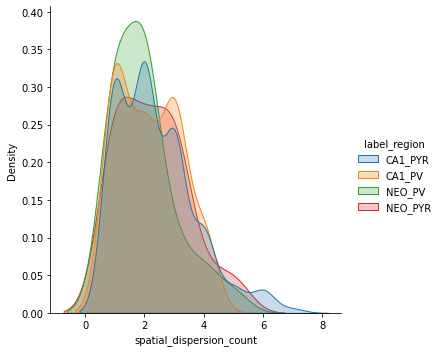

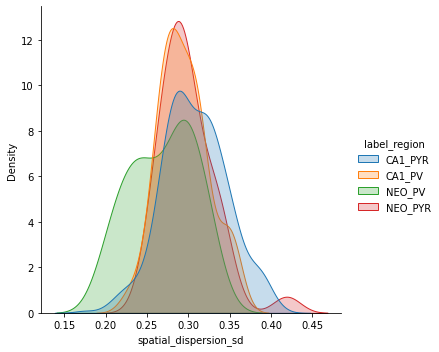

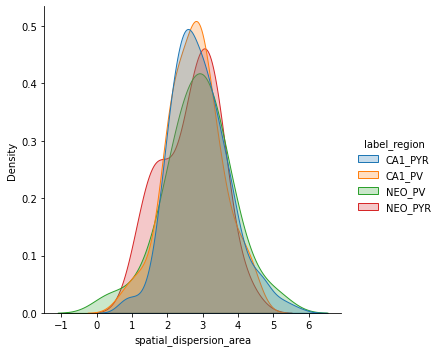

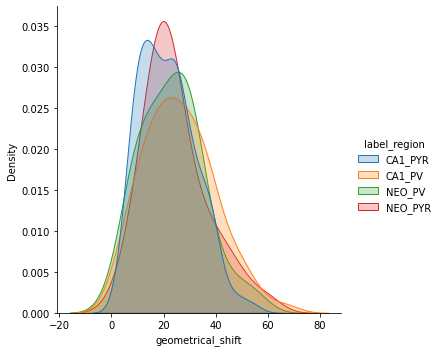

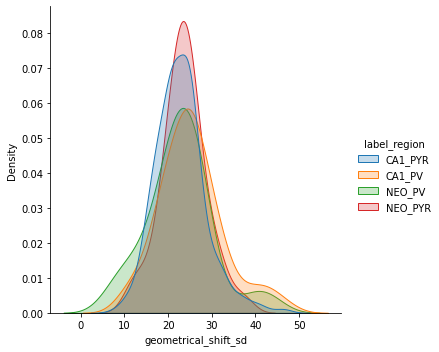

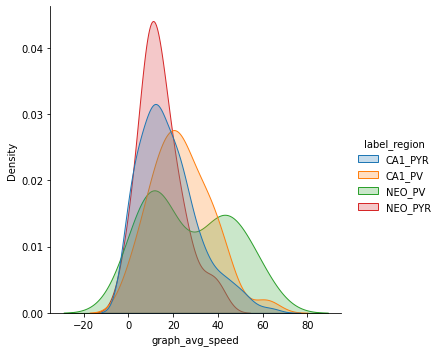

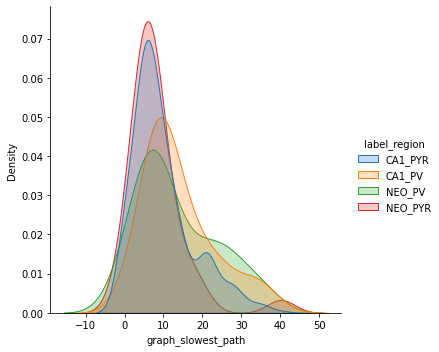

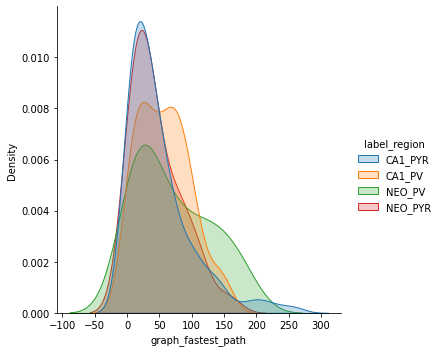

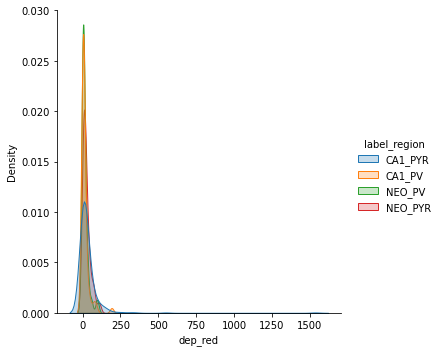

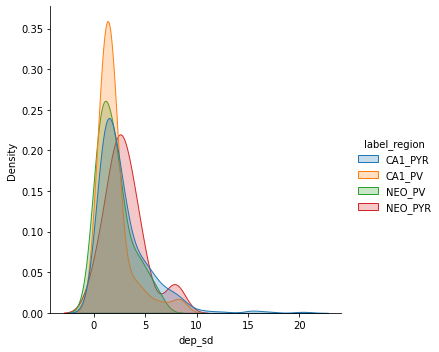

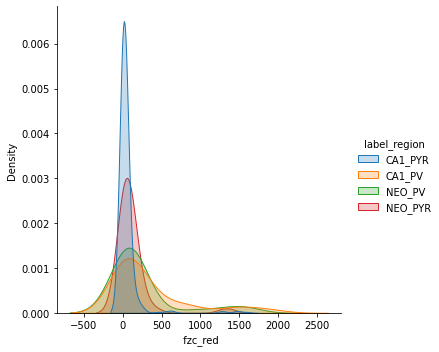

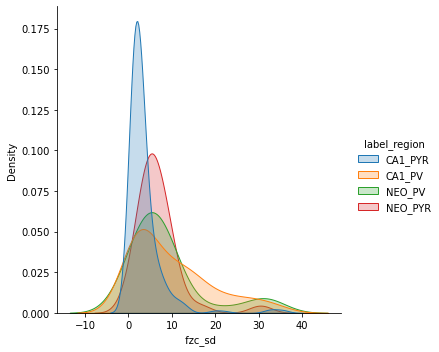

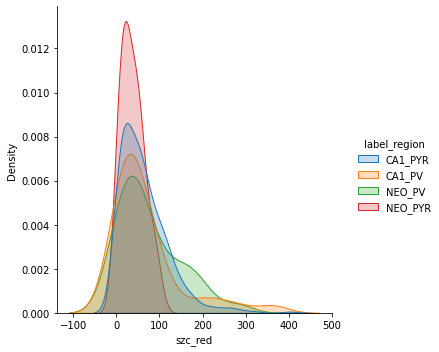

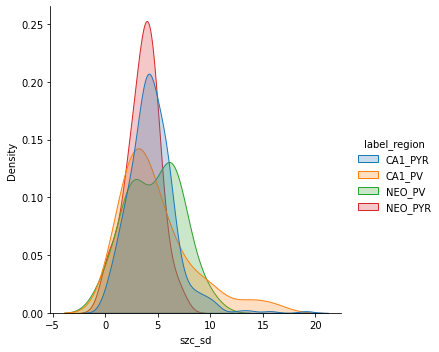

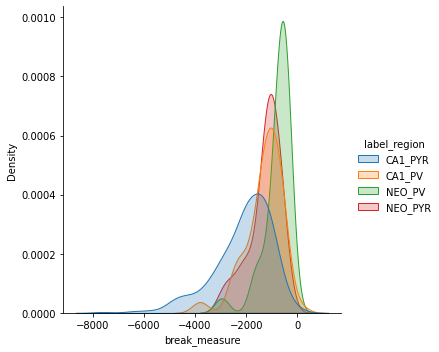

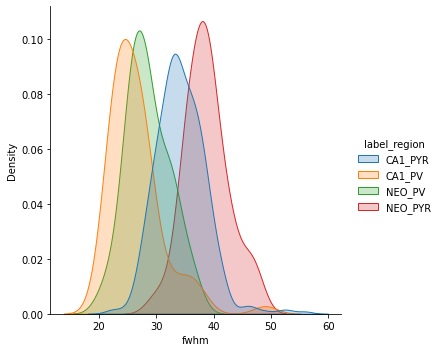

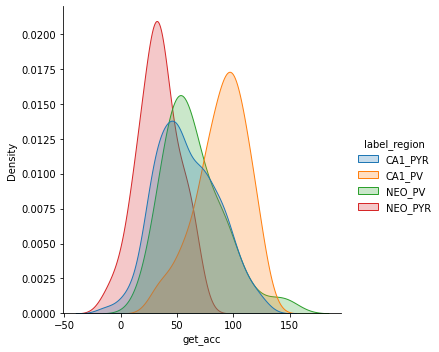

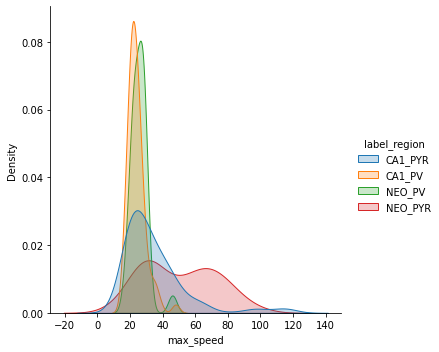

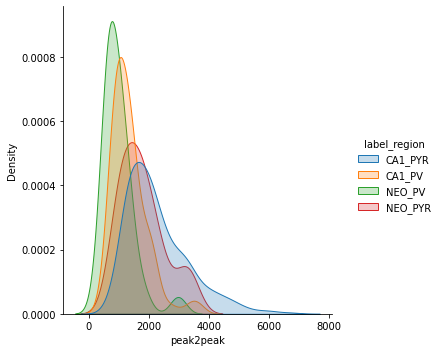

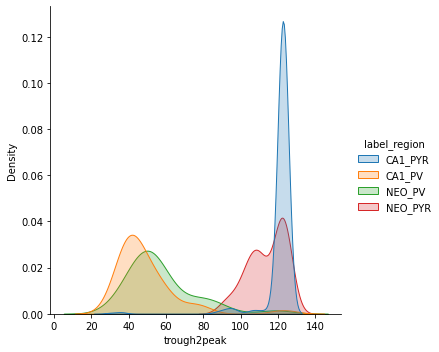

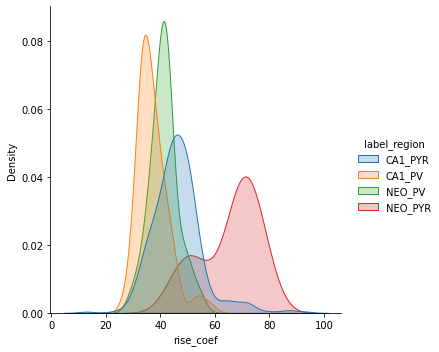

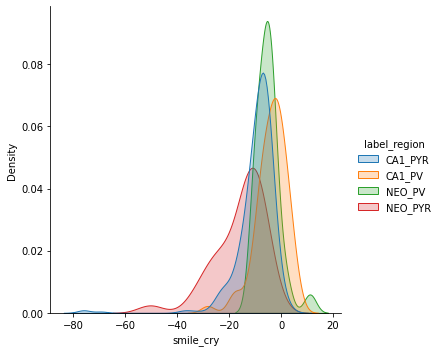

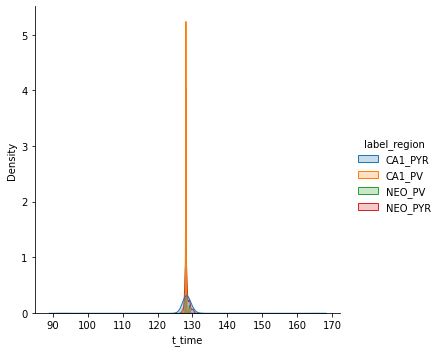

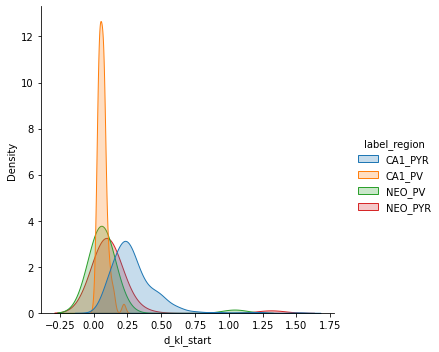

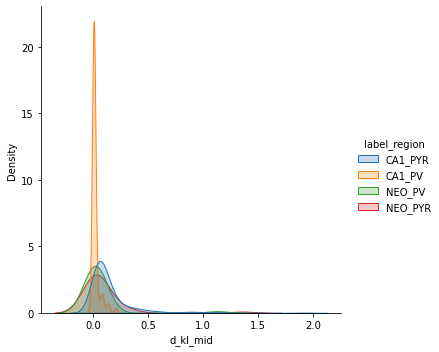

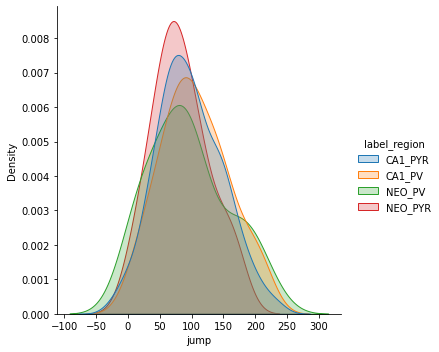

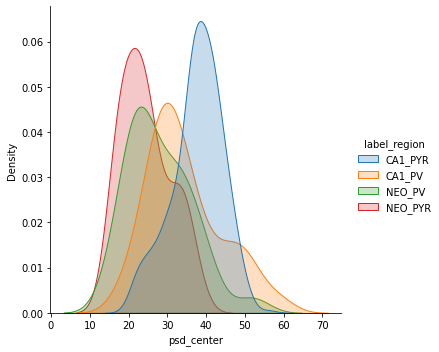

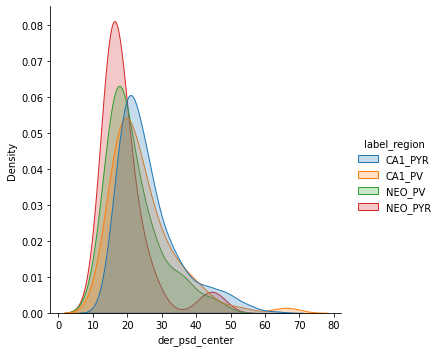

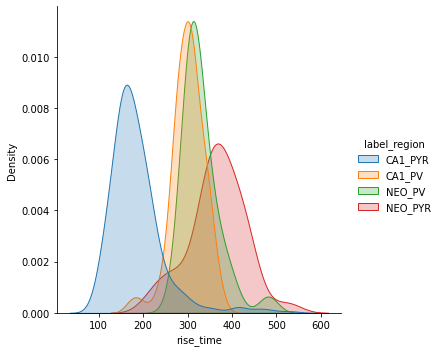

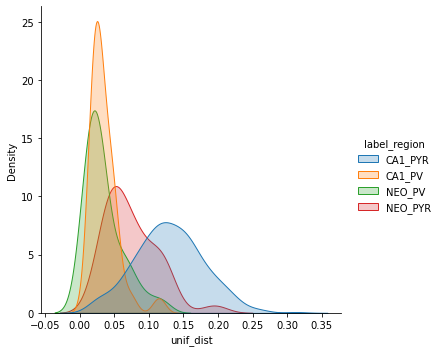

In [7]:
for c in df.columns:
    if c in ['label', 'region', 'name', 'label_region', 'max_abs', 'num_spikes']:
        continue
    sns.displot(data=df, x=c, hue="label_region", common_norm=False, kind="kde", fill=True)

c:\users\lior\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


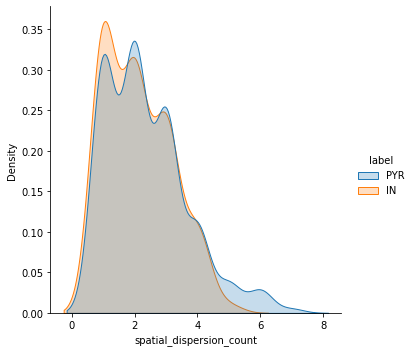

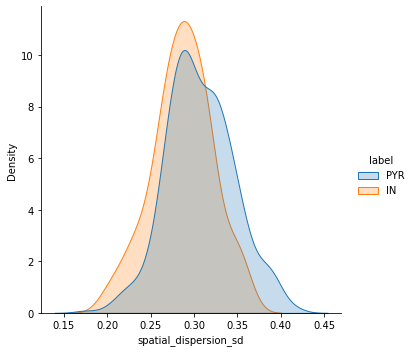

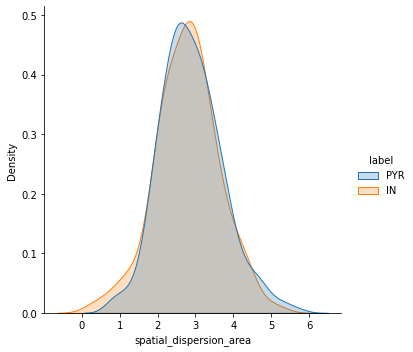

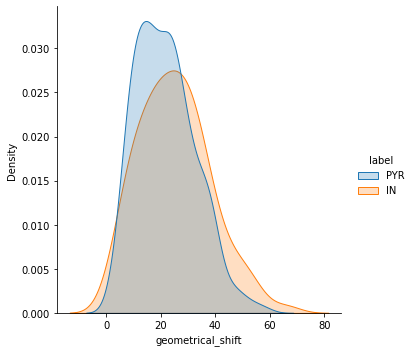

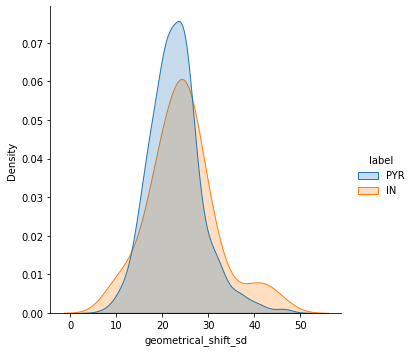

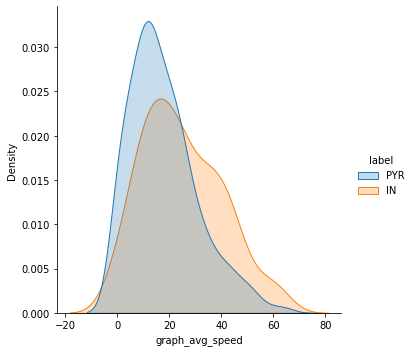

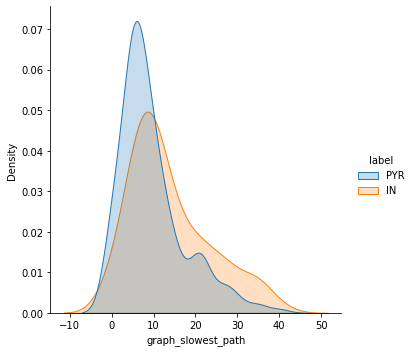

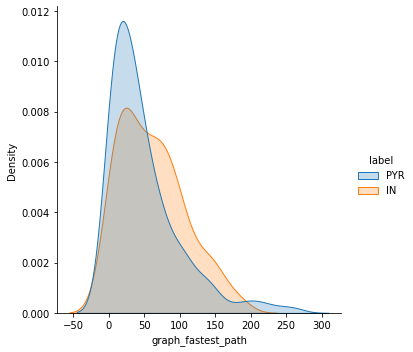

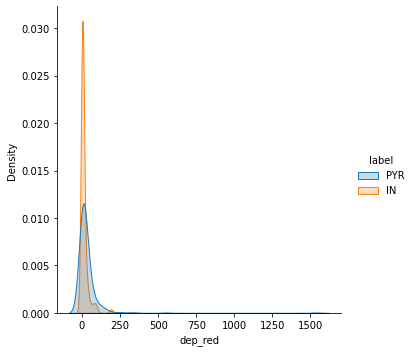

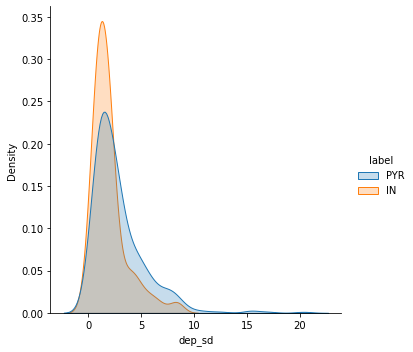

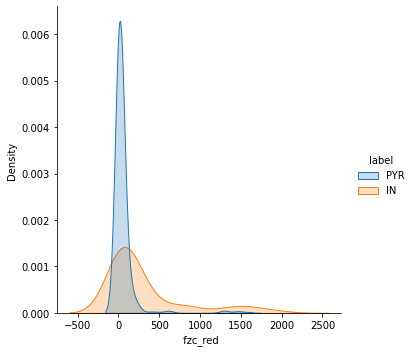

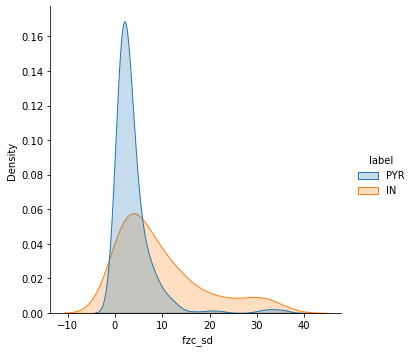

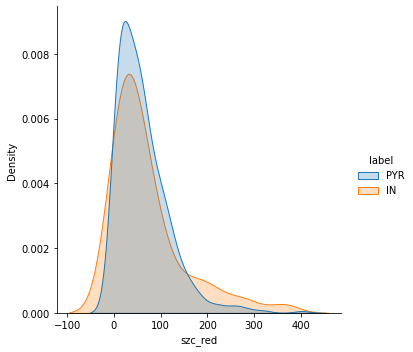

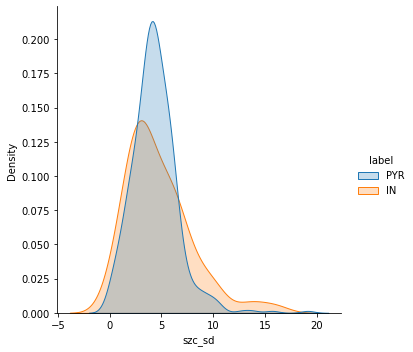

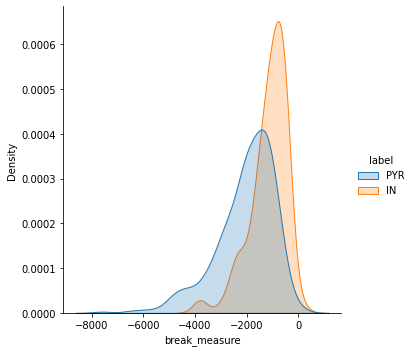

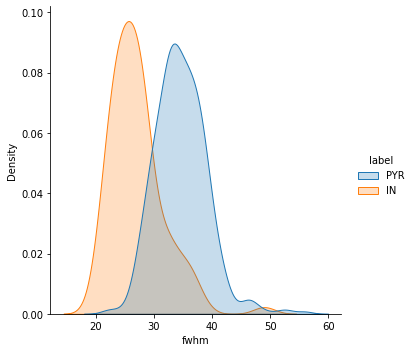

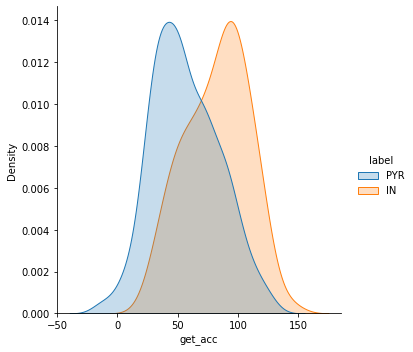

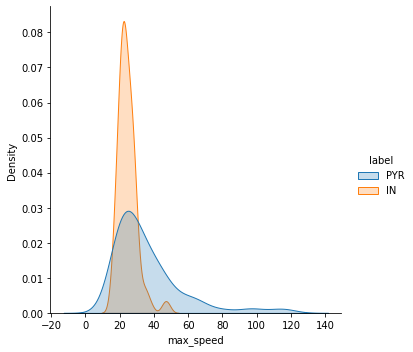

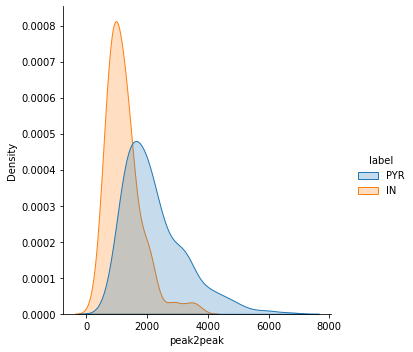

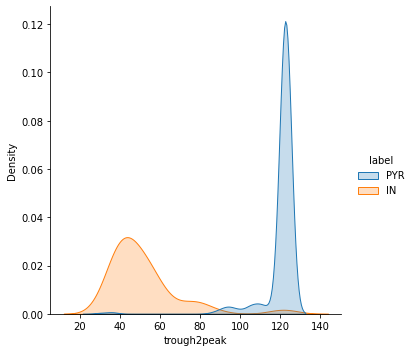

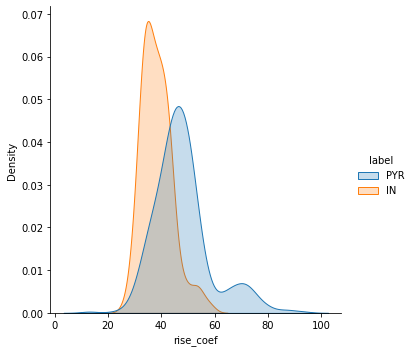

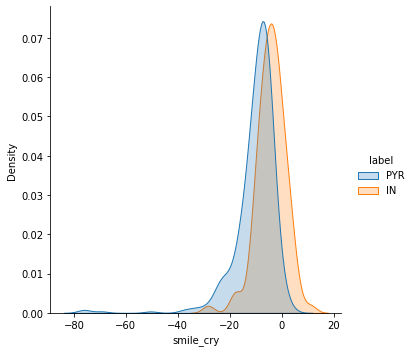

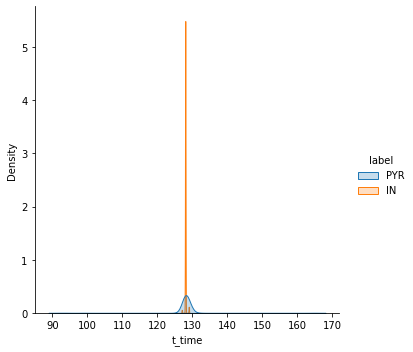

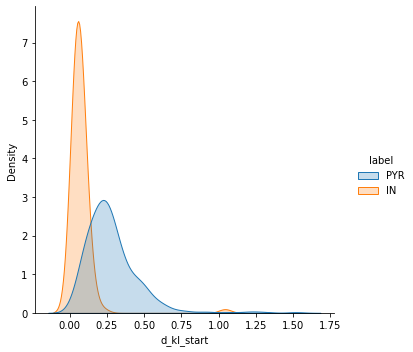

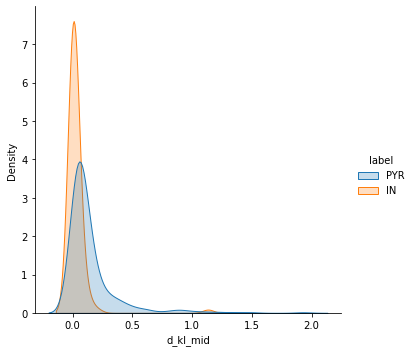

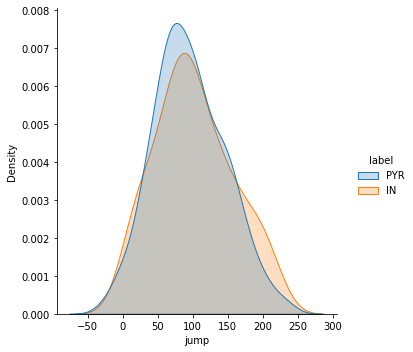

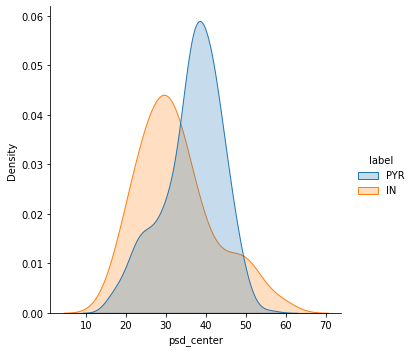

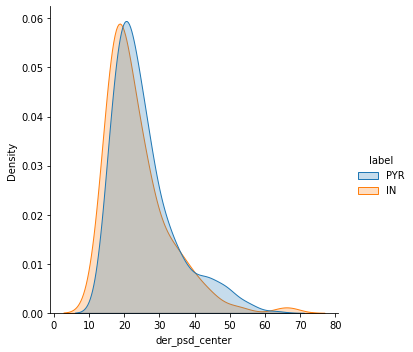

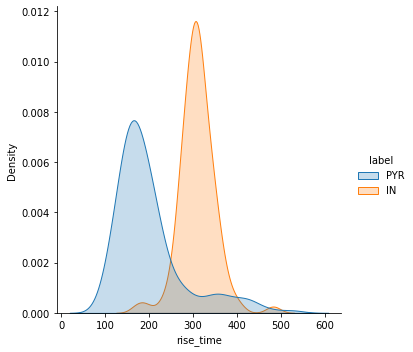

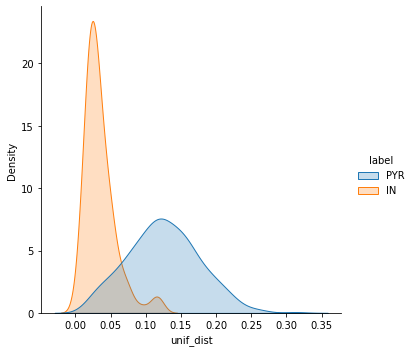

In [8]:
for c in df.columns:
    if c in ['label', 'region', 'name', 'label_region', 'max_abs', 'num_spikes']:
        continue
    sns.displot(data=df, x=c, hue="label", common_norm=False, kind="kde", fill=True)